In [13]:
# This code is partciularly design for the APS data





import pandas as pd
import os

# Directory containing the .sum files
directory = '/Users/touqeergill/Desktop/2022'

# List to hold data from each file
data_frames = []

# Original column names with duplicate '0.00E+00' issue
column_names_raw = [
    '0.00E+00', '0.00E+00', '5.23E-07', '5.42E-07', '5.83E-07', '6.26E-07', '6.73E-07', '7.23E-07', 
    '7.77E-07', '8.35E-07', '8.98E-07', '9.65E-07', '1.04E-06', '1.11E-06', '1.20E-06', '1.29E-06', 
    '1.38E-06', '1.49E-06', '1.60E-06', '1.72E-06', '1.84E-06', '1.98E-06', '2.13E-06', '2.29E-06', 
    '2.46E-06', '2.64E-06', '2.84E-06', '3.05E-06', '3.28E-06', '3.52E-06', '3.79E-06', '4.07E-06', 
    '4.37E-06', '4.70E-06', '5.05E-06', '5.43E-06', '5.83E-06', '6.26E-06', '6.73E-06', '7.23E-06', 
    '7.77E-06', '8.35E-06', '8.98E-06', '9.65E-06', '1.04E-05', '1.11E-05', '1.20E-05', '1.29E-05', 
    '1.38E-05', '1.49E-05', '1.60E-05', '1.72E-05', '1.84E-05', '1.98E-05'
]

# Ensure unique column names by appending an index to duplicates
column_names = []
seen = {}
for name in column_names_raw:
    if name in seen:
        seen[name] += 1
        column_names.append(f"{name}_{seen[name]}")
    else:
        seen[name] = 0
        column_names.append(name)

# Iterate over each file in the directory
for filename in sorted(os.listdir(directory)):
    if filename.endswith('.sum'):
        file_path = os.path.join(directory, filename)
        # Read file with space as delimiter and treat consecutive delimiters as one
        df = pd.read_csv(file_path, delim_whitespace=True, header=None, names=column_names)
        data_frames.append(df)

# Concatenate all the data frames into a single data frame
full_data = pd.concat(data_frames, ignore_index=True)

# Specify the path and filename for the Excel file
excel_file_path = '/Users/touqeergill/Desktop/2022/CompiledData.xlsx'

# Save the DataFrame to an Excel file
full_data.to_excel(excel_file_path, index=False, engine='openpyxl')

# Confirmation message
print(f'Data successfully saved to {excel_file_path}')

Data successfully saved to /Users/touqeergill/Desktop/2022/CompiledData.xlsx


In [33]:
import pandas as pd
import numpy as np

# Define the path to the Excel file
file_path = '/Users/touqeergill/Desktop/CompiledData (2022).xlsx'

# Load the data from the Excel file
data = pd.read_excel(file_path)

# Define the number of rows for which you want to generate date intervals
total_rows = 42134  # Modify this number as needed

# Set the start and end datetime for the entire year 2011
start_datetime = pd.Timestamp('2022-01-01 00:00:00')
end_datetime = pd.Timestamp('2022-12-31 23:50:00')

# Calculate the total number of seconds in the year 2011
total_seconds = (end_datetime - start_datetime).total_seconds()

# Generate a date range that spans the entire year with the specified number of rows
date_range = pd.date_range(start=start_datetime, end=end_datetime, periods=total_rows)

# Truncate or extend the data frame to match the specified number of rows
data = data.iloc[:total_rows] if len(data) >= total_rows else pd.concat([data] * (total_rows // len(data) + 1), ignore_index=True).iloc[:total_rows]

# Assign the calculated date range to the DataFrame
data['Date'] = date_range

# Define the path to save the new Excel file
output_path = '/Users/touqeergill/Desktop/Updated_2022_Dates.xlsx'

# Save the updated dataset to a new Excel file
data.to_excel(output_path, index=False)

print(f'Dataset with updated dates saved to {output_path}')

Dataset with updated dates saved to /Users/touqeergill/Desktop/Updated_2022_Dates.xlsx


In [34]:
import pandas as pd
import os

# Define the file path and name
file_path = '/Users/touqeergill/Desktop/APS_(2010_2022).xlsx'

# Load the Excel file
df = pd.read_excel(file_path)

# Use the first column as the date column by position
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])

# Set the date column as the index
df.set_index(df.columns[0], inplace=True)

# Calculate the hourly average across columns B to AM
hourly_average = df.resample('H').mean()

# Save the result to a new Excel file
output_file = os.path.join('/Users/touqeergill/Desktop', 'Hourly_Averages.xlsx')
hourly_average.to_excel(output_file)

print(f'Hourly average data saved to {output_file}')

Hourly average data saved to /Users/touqeergill/Desktop/Hourly_Averages.xlsx


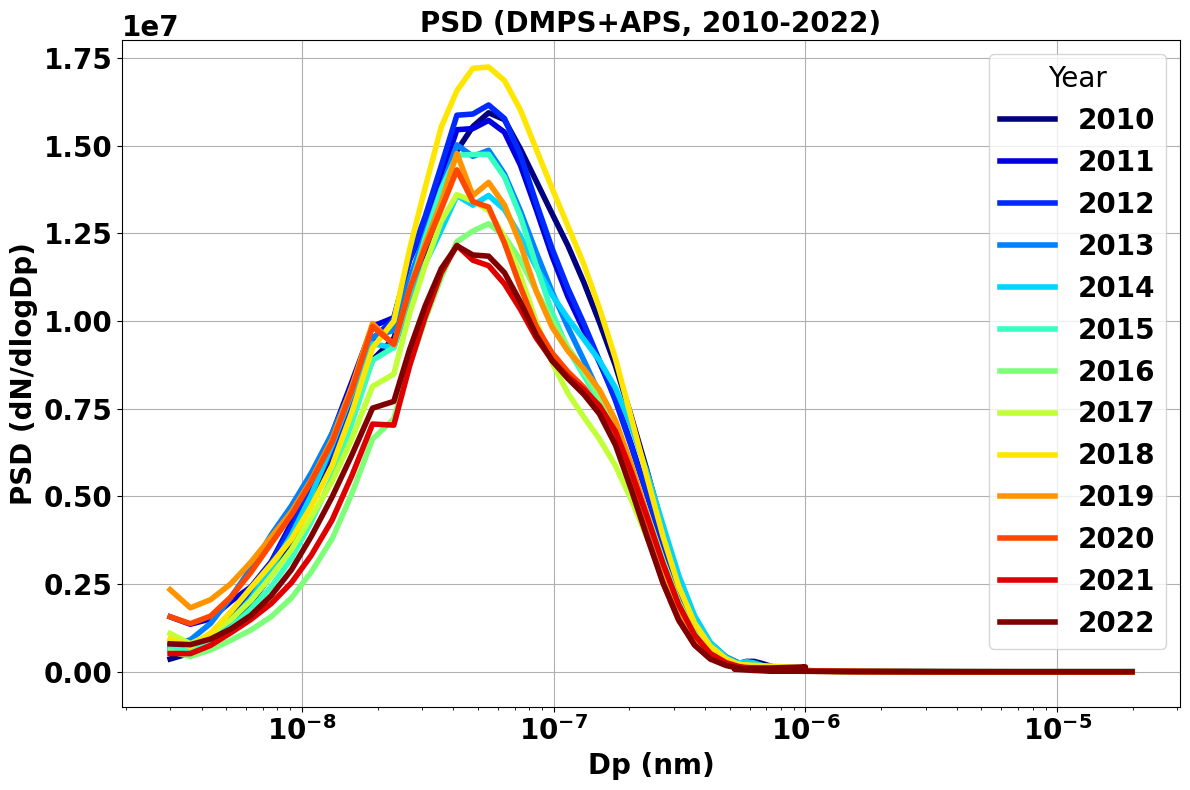

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_psd_by_years(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'Date' column
    diameters_float = [float(d) for d in diameters]

    # Filter data for years 2010 to 2022
    data = data[data['Date'].dt.year.between(2010, 2022)]
    years = sorted(data['Date'].dt.year.unique())

    # Prepare a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

    # Plot data for each year
    for year, color in zip(years, colors):
        yearly_data = data[data['Date'].dt.year == year]
        yearly_data = yearly_data.dropna(subset=diameters)
        sum_psd = yearly_data.iloc[:, 1:].sum()
        
        ax.semilogx(diameters_float, sum_psd, linewidth=4, color=color, label=str(year))

    # Set plot titles and labels
    ax.set_title('PSD (DMPS+APS, 2010-2022)', fontsize=20, weight='bold')
    ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
    ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
    for text in legend.get_texts():
        text.set_weight('bold')

    # Adjusting the tick labels and exponent notation
    ax.tick_params(axis='both', which='major', labelsize=20)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Set the offset text for scientific notation to be bold and size 20
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_weight('bold')
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_weight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/2. DMPS + APS Hourly Avg (2010-2022).xlsx'
y_min = -1000000  # Set minimum y-axis value
y_max = 18000000  # Set maximum y-axis value
plot_psd_by_years(file_path, y_min, y_max)